# Title: Medical Insurance Cost Prediction

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Data load

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.shape

(1338, 7)

# Dataset

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking missing data, dulicate data.

In [6]:
df.isna().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

# no missing value

In [7]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df.duplicated().sum()

1

In [9]:
df=df.drop_duplicates()
df.duplicated().sum()

0

# Describe the mean ,std,... of Numerical columns

In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualization

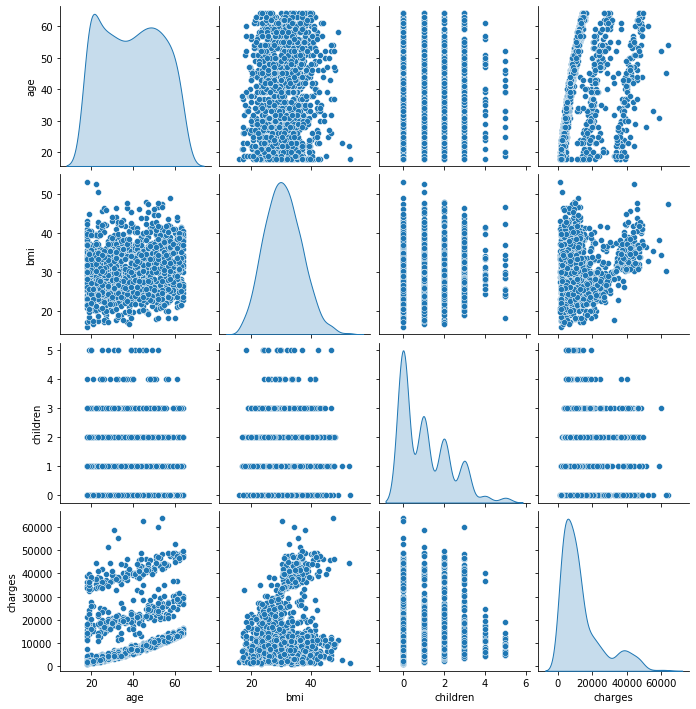

In [11]:
sns.pairplot(data=df, diag_kind='kde')

Text(0.5, 1.0, 'SCATTER PLOT B/W CHARGES VS AGE')

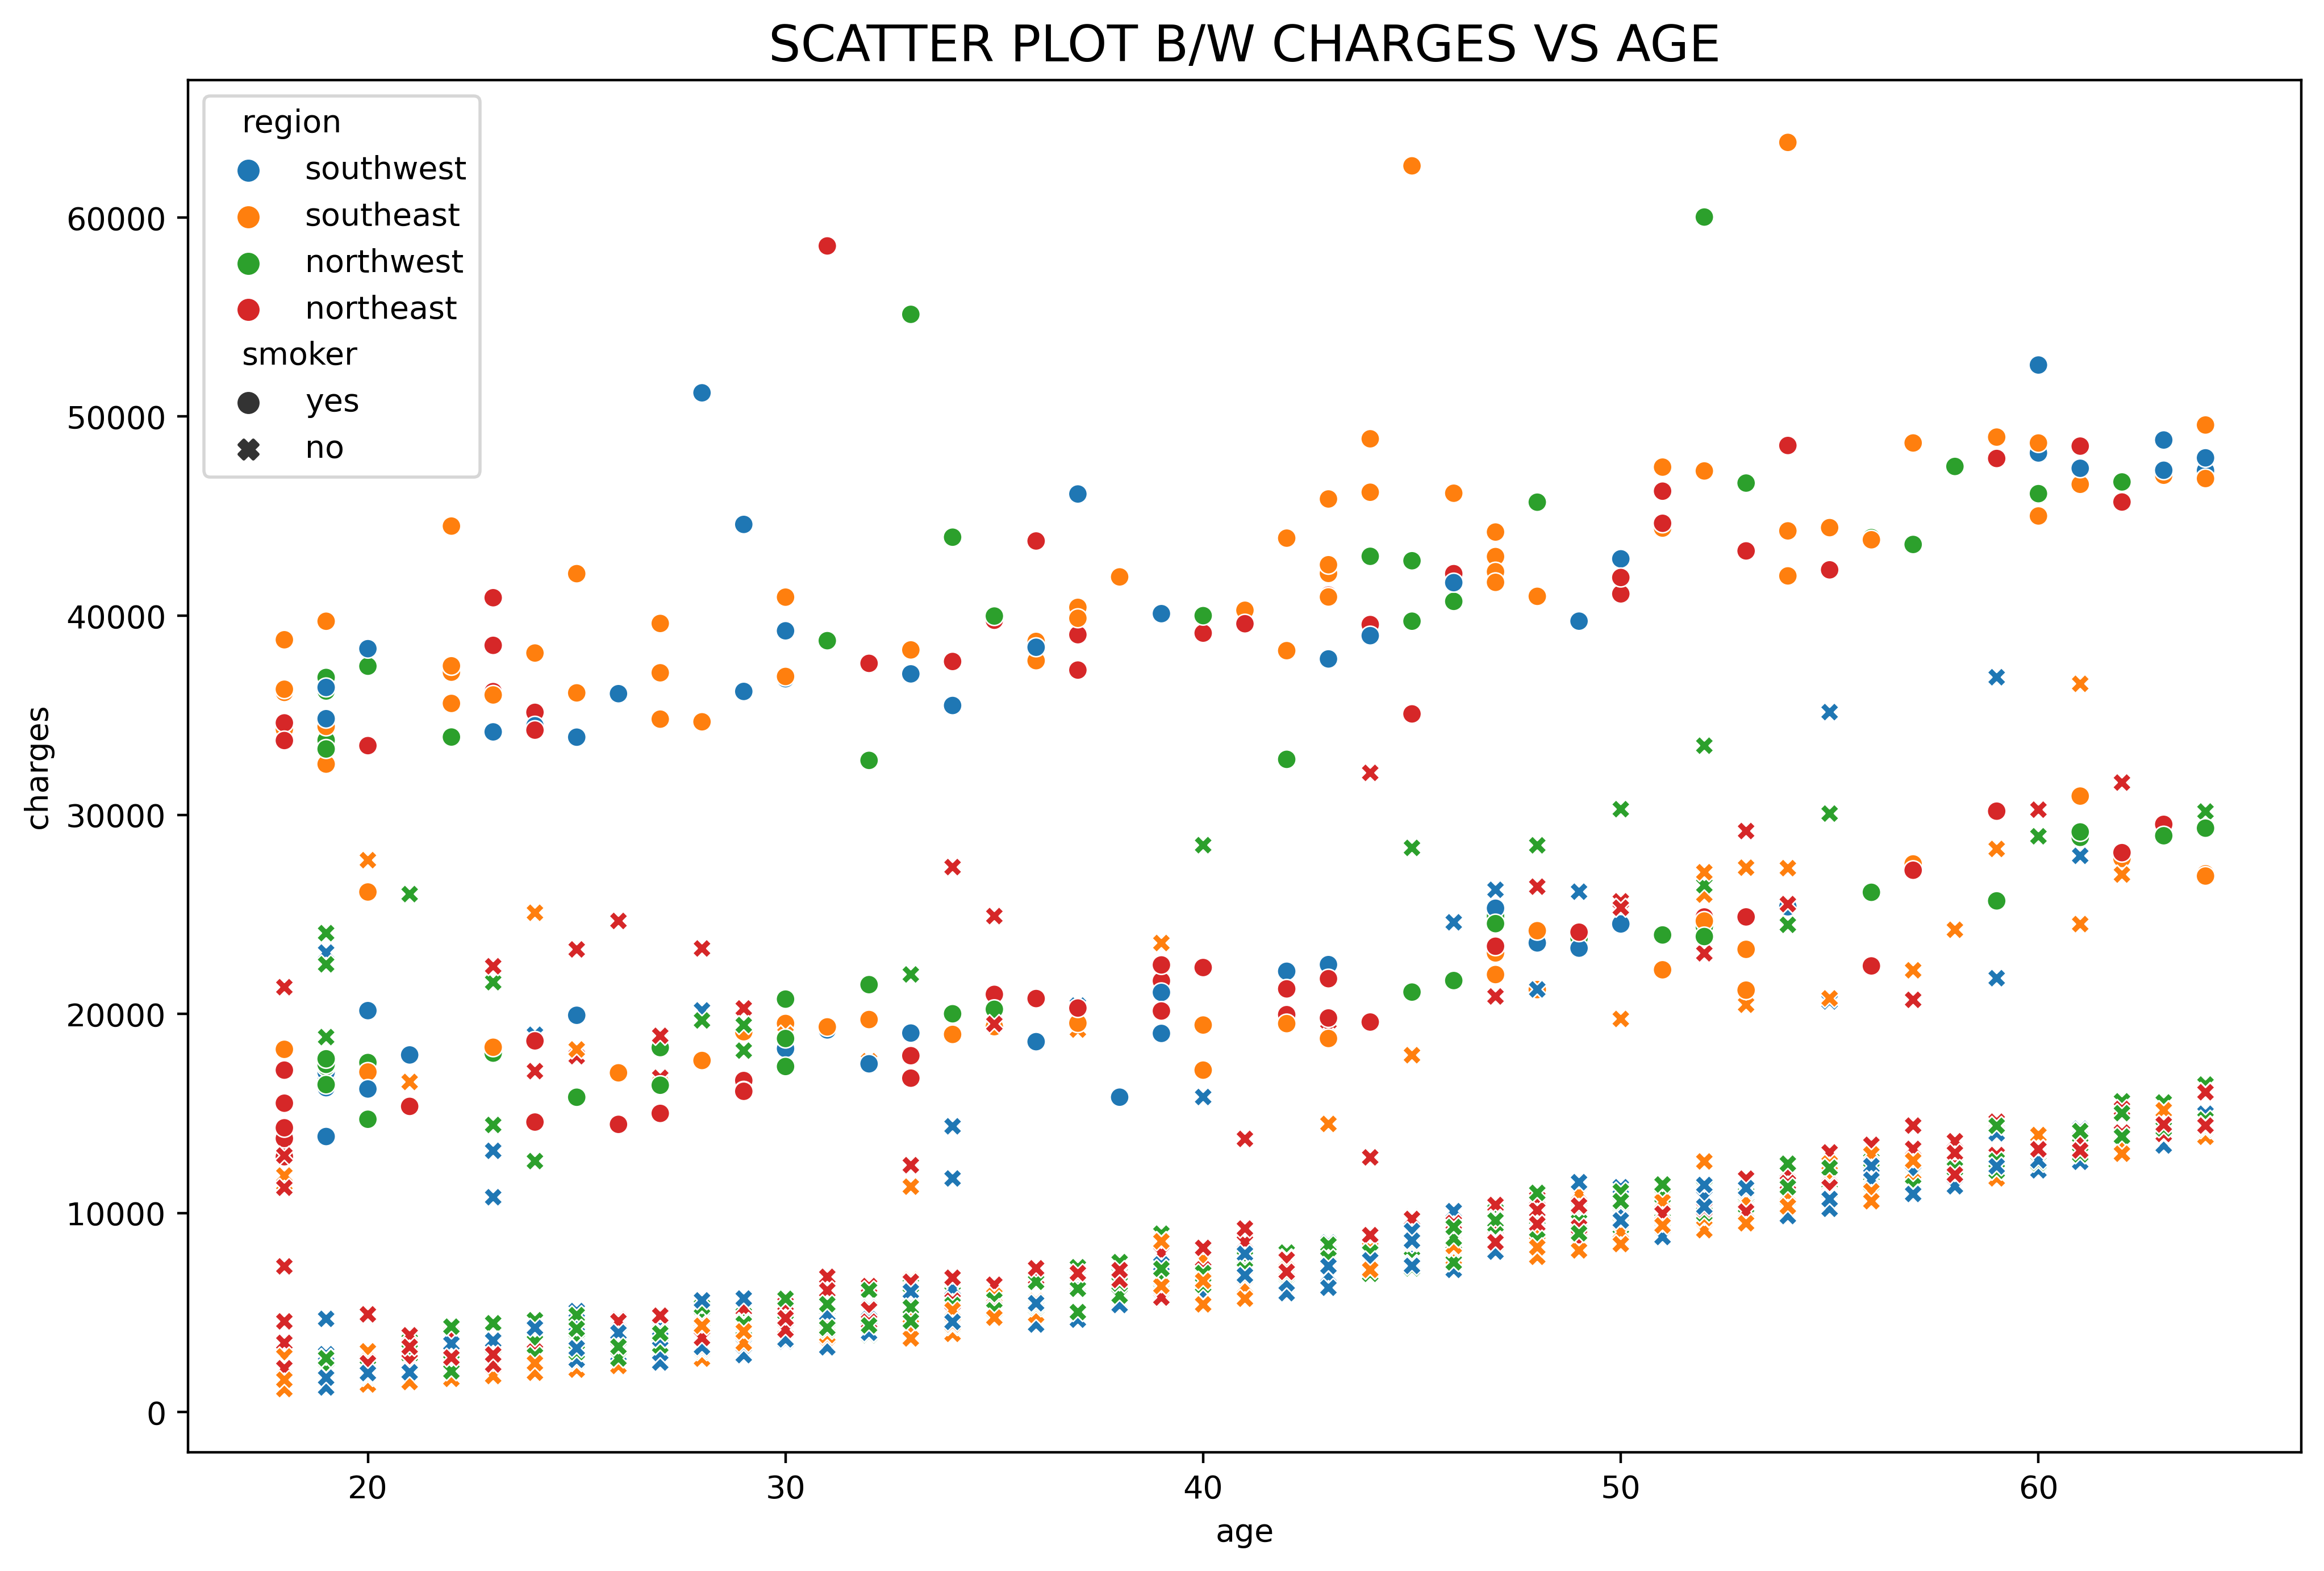

In [12]:
fig=plt.figure(figsize=(12,8),dpi=400)
sns.scatterplot(x='age',y='charges',data=df,hue="region",style="smoker")
#sns.scatterplot(x='age',y='charges',data=df,style="smoker")
plt.title("SCATTER PLOT B/W CHARGES VS AGE",fontsize=16)


Text(0.5, 1.0, 'SCATTER PLOT B/W CHARGES VS BMI')

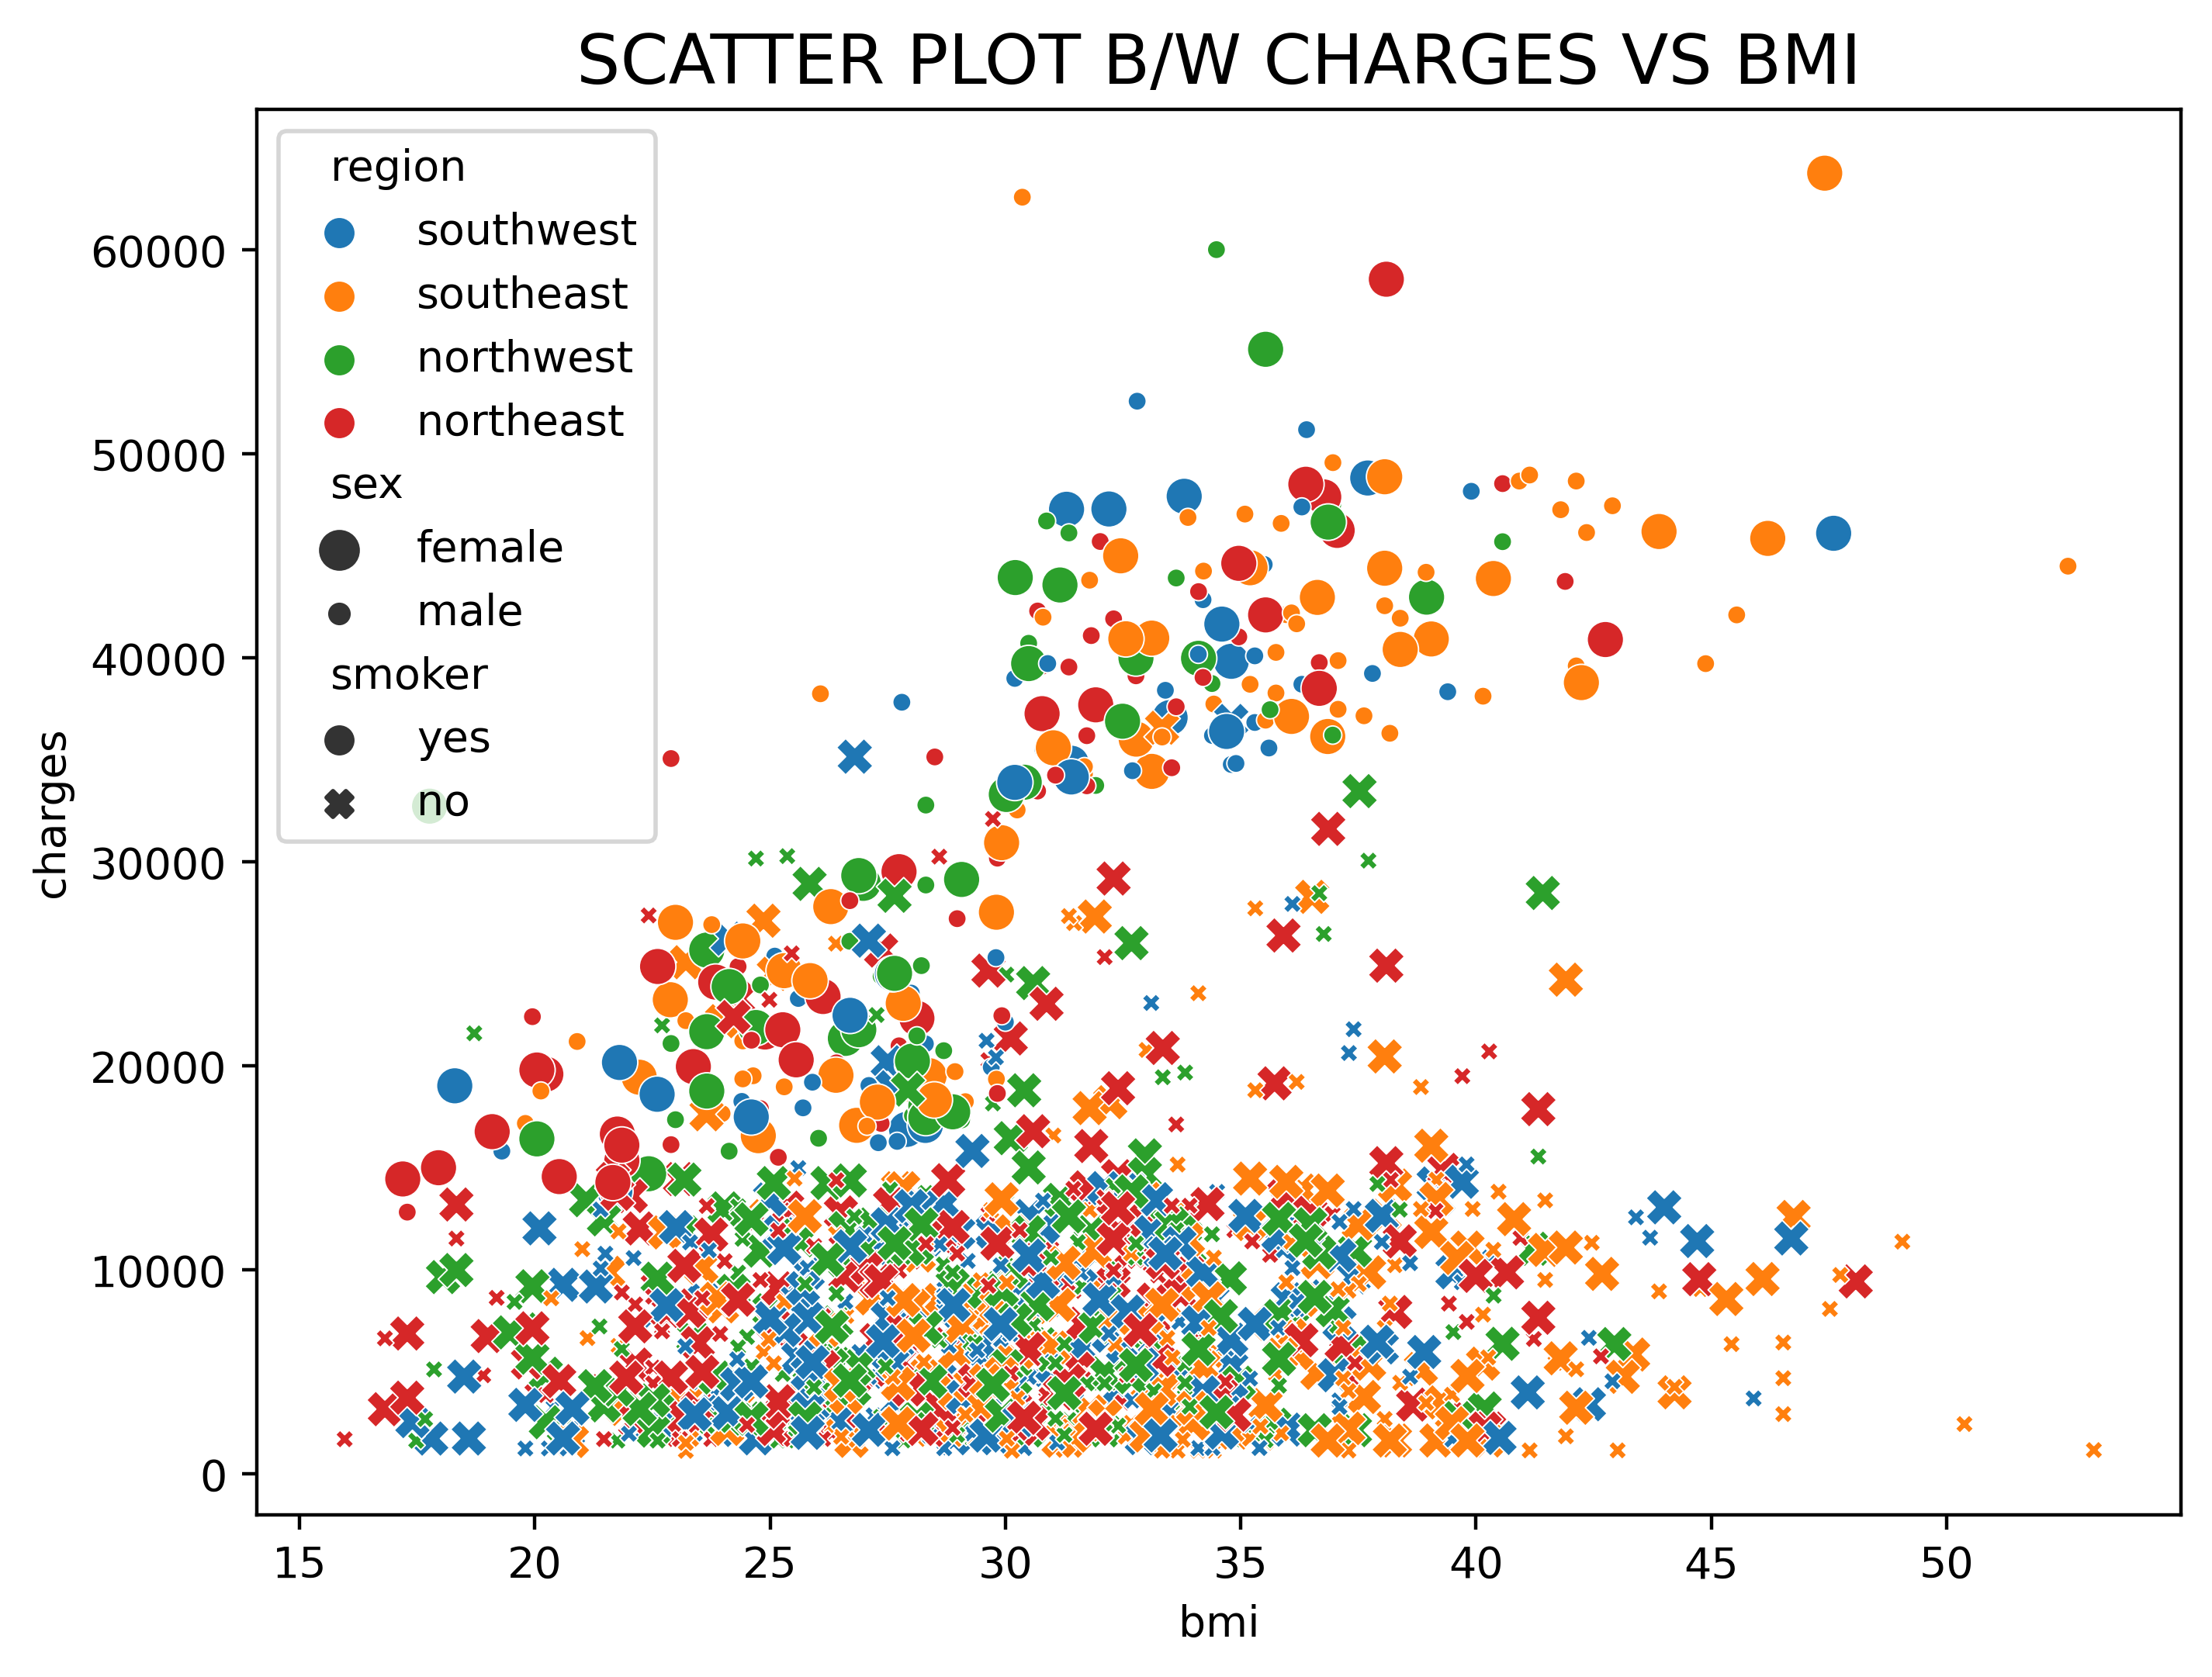

In [13]:
plt.figure(figsize=(8,6),dpi=400)
sns.scatterplot(x='bmi',y='charges',data=df,hue='region',size="sex",style="smoker")
#sns.scatterplot(x='bmi',y='charges',data=df,size="sex",style="smoker")
plt.title("SCATTER PLOT B/W CHARGES VS BMI",fontsize=16)

Text(0.5, 1.0, 'PLOT OF NO OF CHILDREN OF DIFFERENT SEX ')

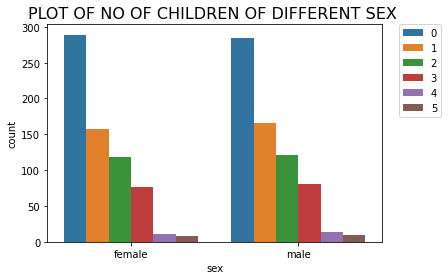

In [14]:
sns.countplot(data=df,x='sex',hue="children")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("PLOT OF NO OF CHILDREN OF DIFFERENT SEX ",fontsize=16)

Text(0.5, 1.0, 'BMI DISTRIBUTION')

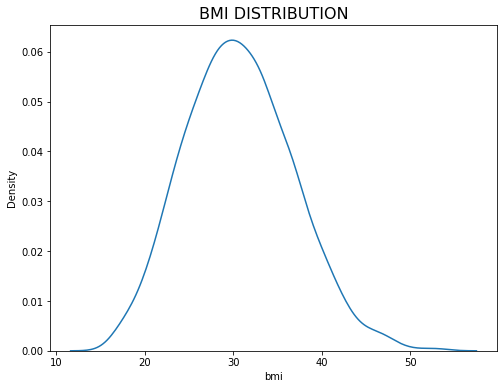

In [15]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df,x='bmi')
plt.title("BMI DISTRIBUTION",fontsize=16)

Text(0.5, 1.0, 'COUNT VS NO OF CHILDREN')

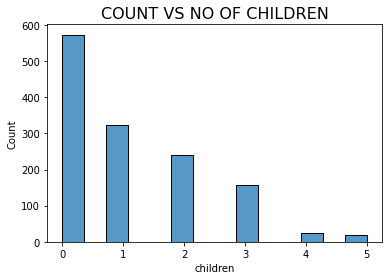

In [16]:
sns.histplot(data=df,x='children')
plt.title("COUNT VS NO OF CHILDREN",fontsize=16)

Text(0.5, 1.0, 'REGION WISE NO OF SMOKER ')

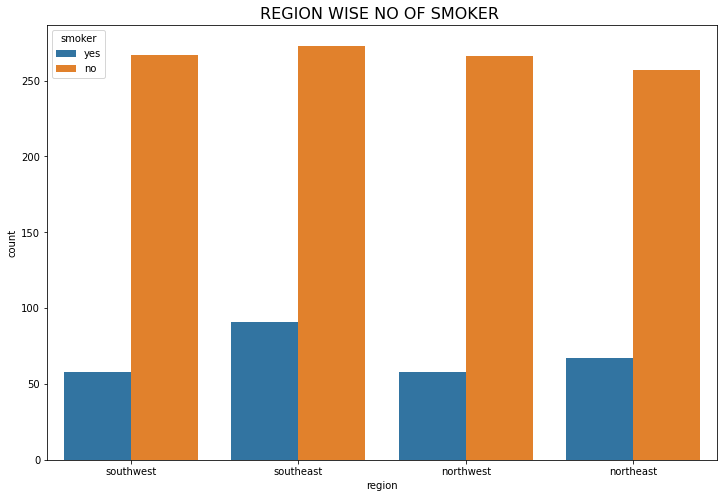

In [17]:
fig=plt.figure(figsize=(12,8))
sns.countplot(data=df,x="region",hue="smoker")
plt.title("REGION WISE NO OF SMOKER ",fontsize=16)

Text(0.5, 1.0, 'CHARGES DISTRIBUTION')

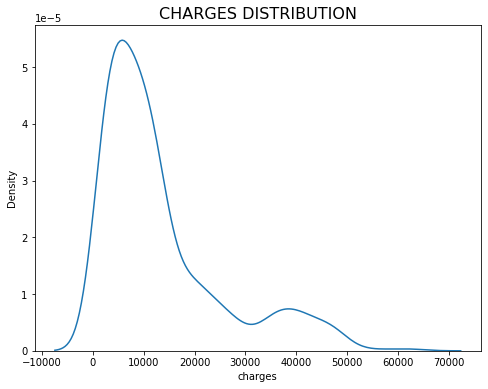

In [18]:
plt.figure(figsize=(8,6))
sns.kdeplot(df['charges'])
plt.title("CHARGES DISTRIBUTION",fontsize=16)


Text(0.5, 1.0, 'BOX PLOT(CHARGES VS SEX)')

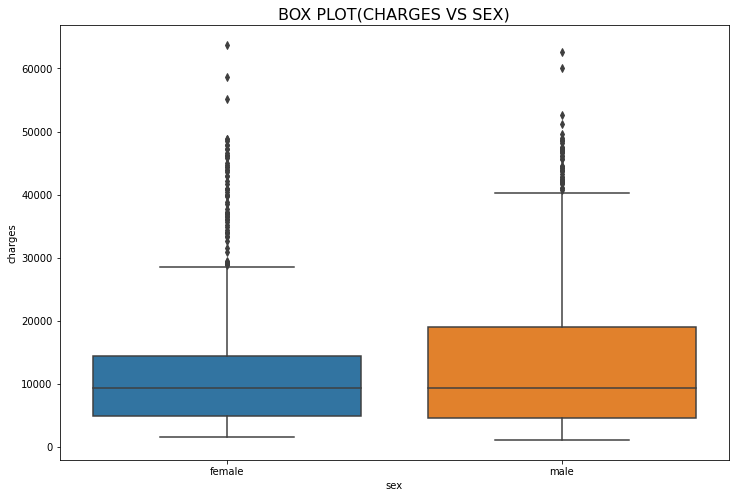

In [19]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(y="charges",x="sex",data=df)
plt.title("BOX PLOT(CHARGES VS SEX)",fontsize=16)

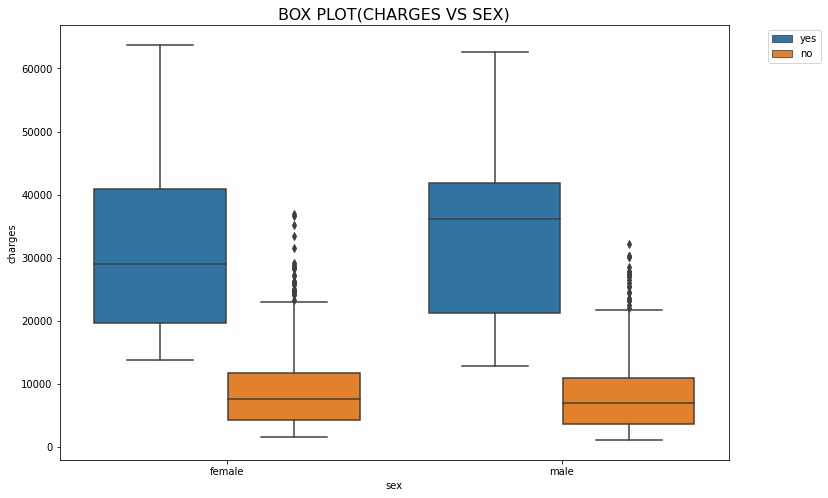

In [20]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(y="charges",x="sex",data=df,hue='smoker')
plt.title("BOX PLOT(CHARGES VS SEX)",fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)

Text(0.5, 1.0, 'BOX PLOT(CHARGES VS CHILDREN)')

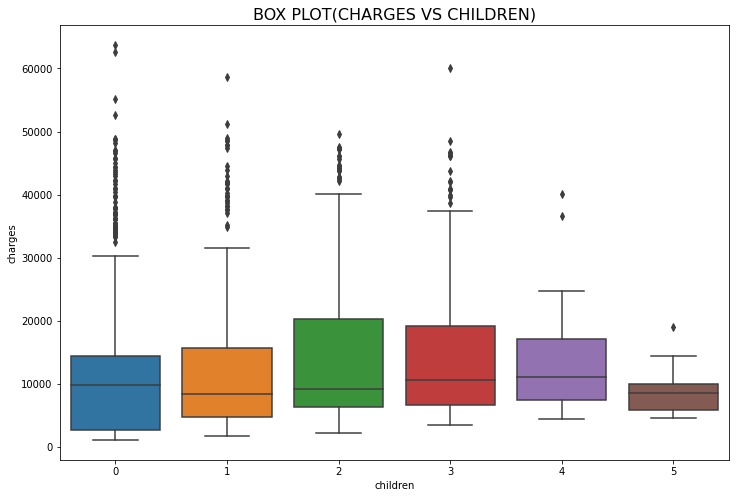

In [21]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(y="charges",x="children",data=df)
plt.title("BOX PLOT(CHARGES VS CHILDREN)",fontsize=16)

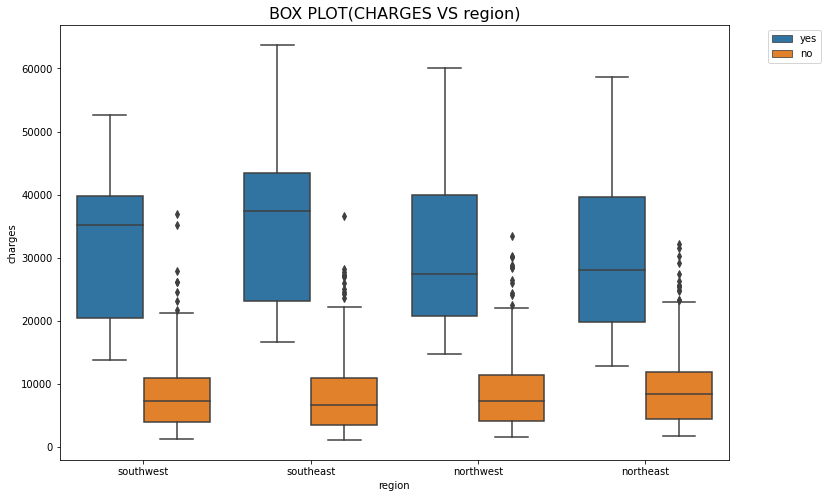

In [22]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(y="charges",x="region",data=df,hue='smoker')
plt.title("BOX PLOT(CHARGES VS region)",fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)

# Correlation b/w  Numerical feature

Text(0.5, 1.0, 'Heatmap')

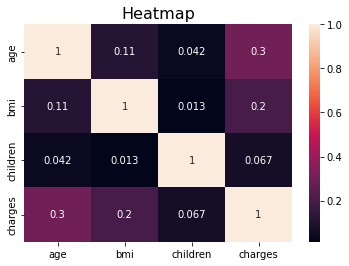

In [23]:
df.corr()
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap",fontsize=16)

# Featue encoding(Categorical Column to Numerical Column)

In [24]:
from sklearn.preprocessing import LabelEncoder
df[['sex','smoker']] = df[['sex','smoker']].apply(LabelEncoder().fit_transform)
#df.replace({"sex":{"male":1,"female":0}})

# By ONE HOT ENCODING

In [25]:
dum_reg=pd.get_dummies(df.region, prefix='location')
df=pd.concat([df,dum_reg],axis=1)
df=df.drop(columns="region",axis=1)

# Correlation b/w Numerical feature after feature encoding

In [26]:
df.corr()

,age,sex,bmi,children,smoker,charges,location_northeast,location_northwest,location_southeast,location_southwest
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.298308,0.001868,0.001495,-0.012311,0.009415
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.058044,-0.002008,-0.012482,0.017578,-0.003767
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.198401,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.067389,-0.023202,0.026044,-0.023492,0.021538
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.787234,0.002597,-0.036321,0.068282,-0.037168
charges,0.298308,0.058044,0.198401,0.067389,0.787234,1.000000,0.005945,-0.038695,0.073578,-0.043637
location_northeast,0.001868,-0.002008,-0.138178,-0.023202,0.002597,0.005945,1.000000,-0.319842,-0.345909,-0.320493
location_northwest,0.001495,-0.012482,-0.136138,0.026044,-0.036321,-0.038695,-0.319842,1.000000,-0.345909,-0.320493
location_southeast,-0.012311,0.017578,0.270057,-0.023492,0.068282,0.073578,-0.345909,-0.345909,1.000000,-0.346614
location_southwest,0.009415,-0.003767,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.320493,-0.346614,1.000000


Text(0.5, 1.0, 'Heatmap')

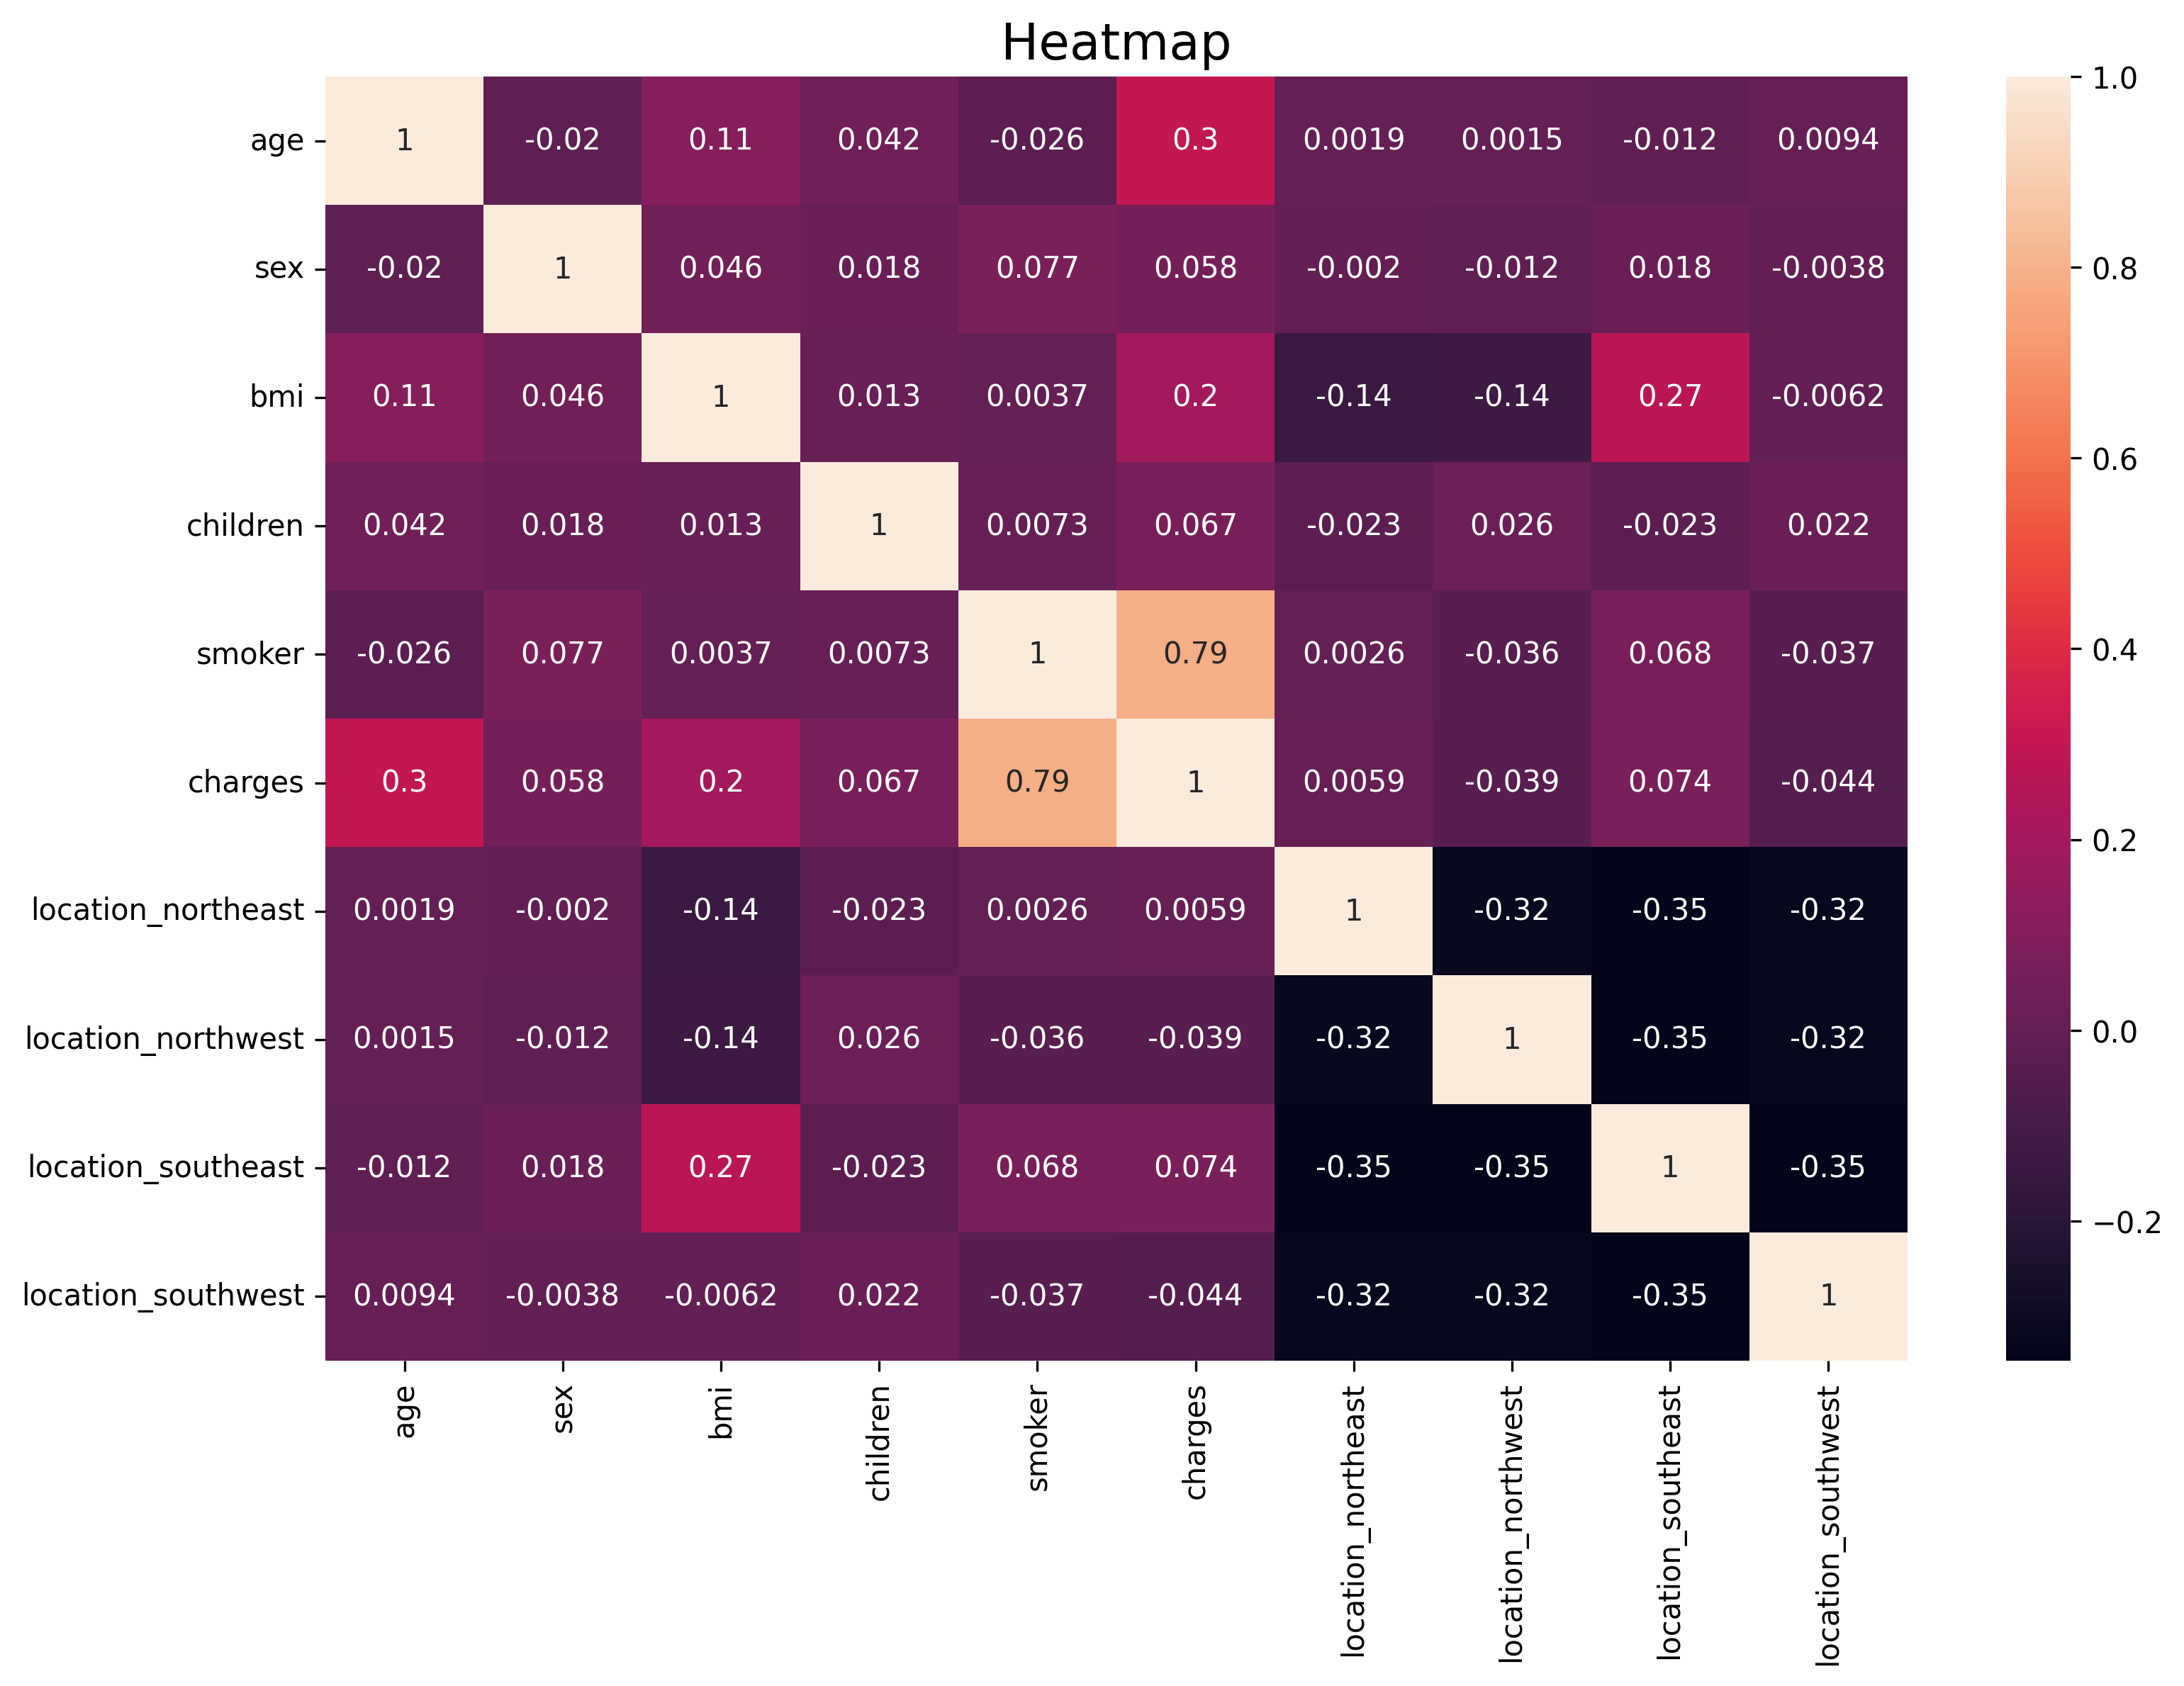

In [27]:
plt.figure(figsize=(12,8),dpi=300)
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap",fontsize=17)

# Extracting dependent and independent variables

In [28]:
x=df.drop(columns="charges", axis=1)
y=df["charges"]


# Splitting the Dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.25,random_state=32)

# MODEL RUN BY DIFFERENT MACHINE LEARNING ALGORITHM 

In [30]:
def model_run (model,x_train,y_train,x_test,y_test):
     
# model Trained By Train Data 

    model.fit(x_train,y_train)
    print("r^2_train :",model.score(x_train,y_train))
    
#predict value
     
    pred_val=model.predict(x_test)
    
#RMSE
    
    rmse=np.sqrt(mean_squared_error(y_test,pred_val))
     
#MAE
        
    mae=mean_absolute_error(y_test,pred_val)
    
#R-square
    
    r2=r2_score(y_test,pred_val)
    
    print("R^2 of Model:",r2)
    
    print("MAE :",mae)
    
    print("RMSE:",rmse)

# Multiple Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
model_run (mlr,x_train,y_train,x_test,y_test)

r^2_train : 0.7397523365923138
R^2 of Model: 0.7802190514692833
MAE : 4199.501390298039
RMSE: 5779.15025766037


# Pipeline FOR Polynomial Regression

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
for n in range(1,5):
    pipl = make_pipeline(PolynomialFeatures(n),LinearRegression())
    print("Deg:", n)
    model_run(pipl,x_train,y_train,x_test,y_test)

Deg: 1
r^2_train : 0.7397523365923138
R^2 of Model: 0.7802190514692833
MAE : 4199.501390298053
RMSE: 5779.150257660368
Deg: 2
r^2_train : 0.83946711991465
R^2 of Model: 0.8655154395605866
MAE : 2742.2661219484276
RMSE: 4520.694700373106
Deg: 3
r^2_train : 0.8496993308739303
R^2 of Model: 0.858141153920493
MAE : 2837.222058462267
RMSE: 4642.983881571375
Deg: 4
r^2_train : 0.8752209702172632
R^2 of Model: 0.6777335416012054
MAE : 3717.34238506776
RMSE: 6998.041566298314


In [33]:
# best value of n is 2(n= Deg of the polynomial)
bpr = make_pipeline(PolynomialFeatures(2),LinearRegression())
model_run(bpr,x_train,y_train,x_test,y_test)

r^2_train : 0.83946711991465
R^2 of Model: 0.8655154395605866
MAE : 2742.2661219484276
RMSE: 4520.694700373106


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor()
model_run (tree,x_train,y_train,x_test,y_test)

r^2_train : 0.9994608620886346
R^2 of Model: 0.6646306294804587
MAE : 3447.9053730119404
RMSE: 7138.8895439918915


# KNN Regressor

In [35]:
from sklearn.neighbors import KNeighborsRegressor
for n in [5,10,15]:
    print("n:",n)
    model = KNeighborsRegressor(n_neighbors=n)
    model_run(model,x_train,y_train,x_test,y_test)

n: 5
r^2_train : 0.39487117614629985
R^2 of Model: 0.10047554664216796
MAE : 8150.299935382091
RMSE: 11691.640461663059
n: 10
r^2_train : 0.29214738228936843
R^2 of Model: 0.13288771468740168
MAE : 8439.295915441791
RMSE: 11479.068150027088
n: 15
r^2_train : 0.24428883022308168
R^2 of Model: 0.13545928975051136
MAE : 8615.340926412937
RMSE: 11462.033906259603


In [36]:
knnr = KNeighborsRegressor(n_neighbors=15) 
model_run(knnr,x_train,y_train,x_test,y_test)

r^2_train : 0.24428883022308168
R^2 of Model: 0.13545928975051136
MAE : 8615.340926412937
RMSE: 11462.033906259603


# RANDOM FOREST REGRESSOR

In [37]:
from sklearn.ensemble import RandomForestRegressor
frst = RandomForestRegressor(max_depth=70, min_samples_leaf=10, min_samples_split=8,
                       n_estimators=1200)
model_run(frst,x_train,y_train,x_test,y_test)

r^2_train : 0.8858886278399197
R^2 of Model: 0.8841144445643251
MAE : 2340.26738208211
RMSE: 4196.46512174364


In [38]:
mdl=[mlr,bpr,tree,knnr,frst]
df1=[]
for m in mdl:
    temp={"Model":m,
         "R2":r2_score(y_test,m.predict(x_test)),
         "MAE":mean_absolute_error(y_test,m.predict(x_test)),
         "RMSE":np.sqrt(mean_squared_error(y_test,m.predict(x_test)))}
    df1.append(temp)

In [39]:
md=["Linear Regression",'Polynomial regression(deg=2)','Decision Tree Regressor','KNN Regressor','Random Forest Regressor']
for i in range(0,len(md)):
    df1[i]['Model']=md[i]

In [40]:
df1=pd.DataFrame(df1)

In [41]:
df1=df1.sort_values("R2",ascending=False)
df1

,Model,R2,MAE,RMSE
4,Random Forest Regressor,0.884114,2340.267382,4196.465122
1,Polynomial regression(deg=2),0.865515,2742.266122,4520.694700
0,Linear Regression,0.780219,4199.501390,5779.150258
2,Decision Tree Regressor,0.664631,3447.905373,7138.889544
3,KNN Regressor,0.135459,8615.340926,11462.033906


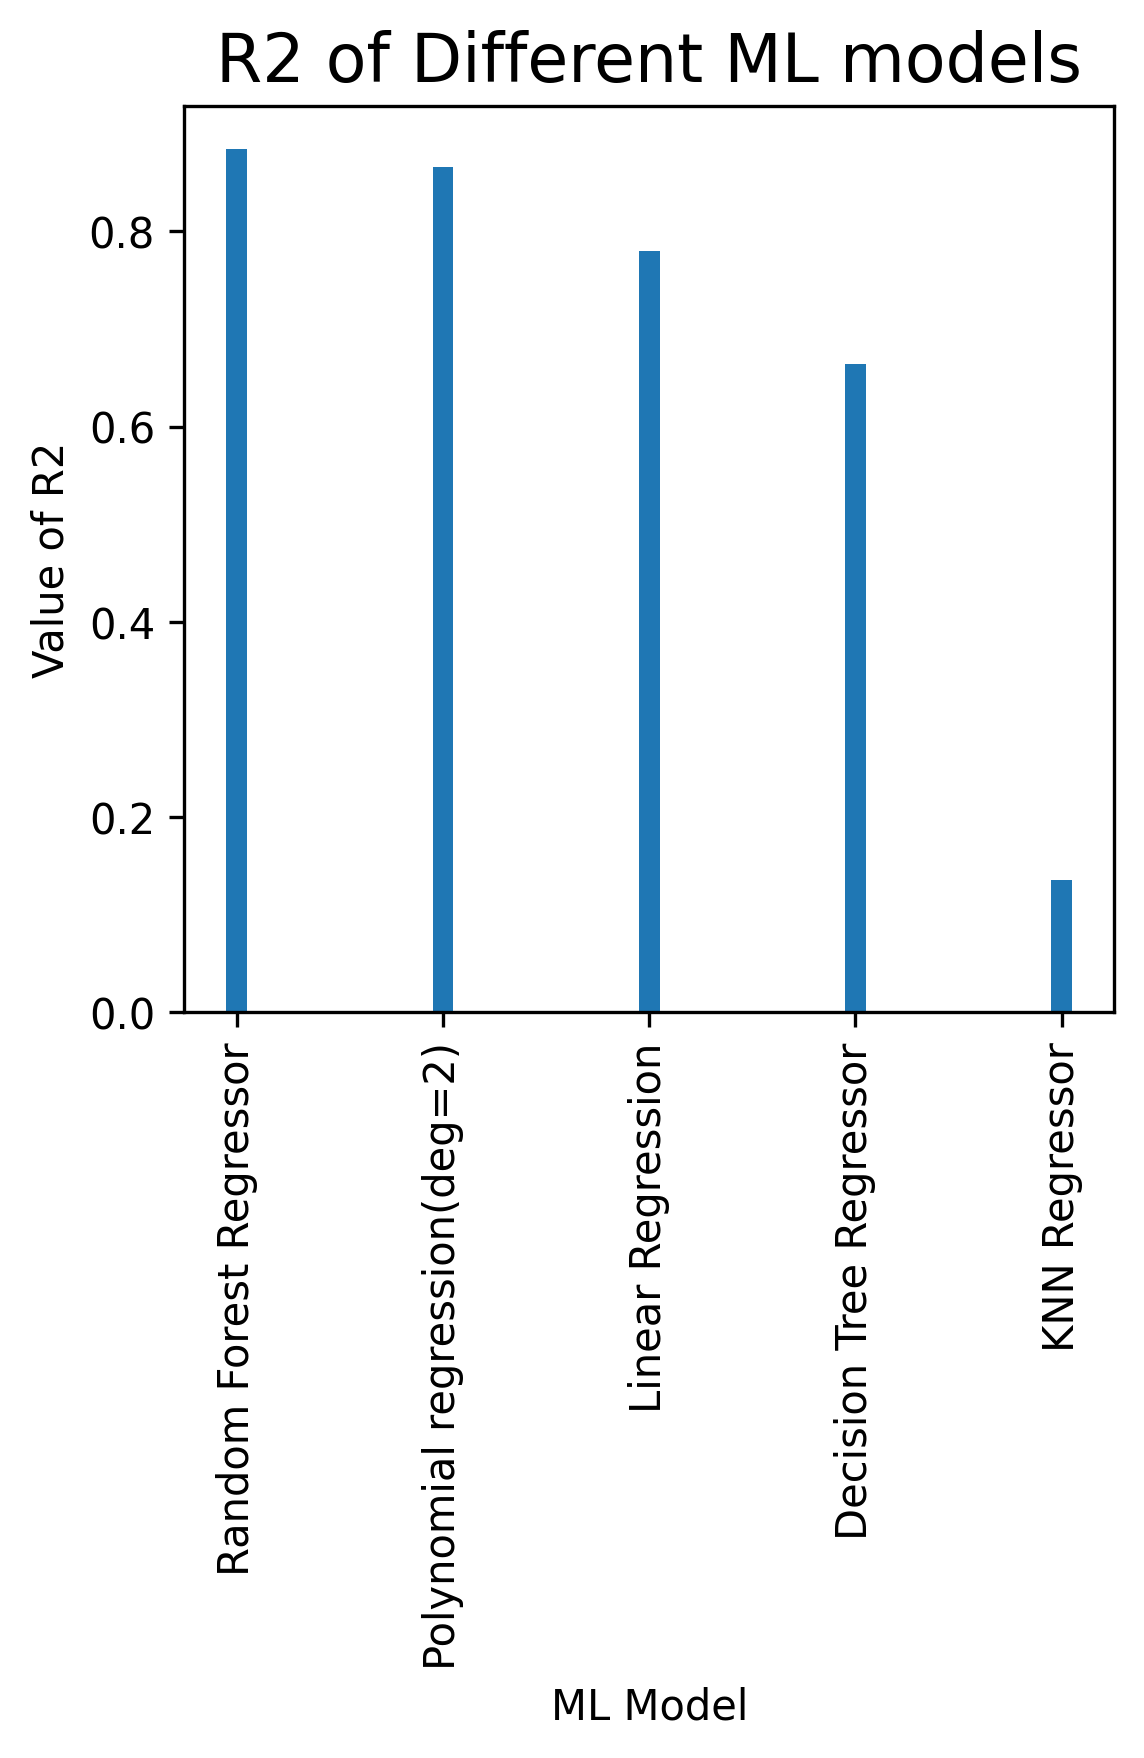

In [42]:
plt.figure(figsize=(4,4),dpi=300)
plt.bar(df1['Model'],df1["R2"], width=.1)
plt.title("R2 of Different ML models",fontsize=16)
plt.xlabel("ML Model",fontsize=10)
plt.ylabel("Value of R2",fontsize=10)
plt.xticks(rotation=90)
plt.show()

#  High R^2 Value means best model .

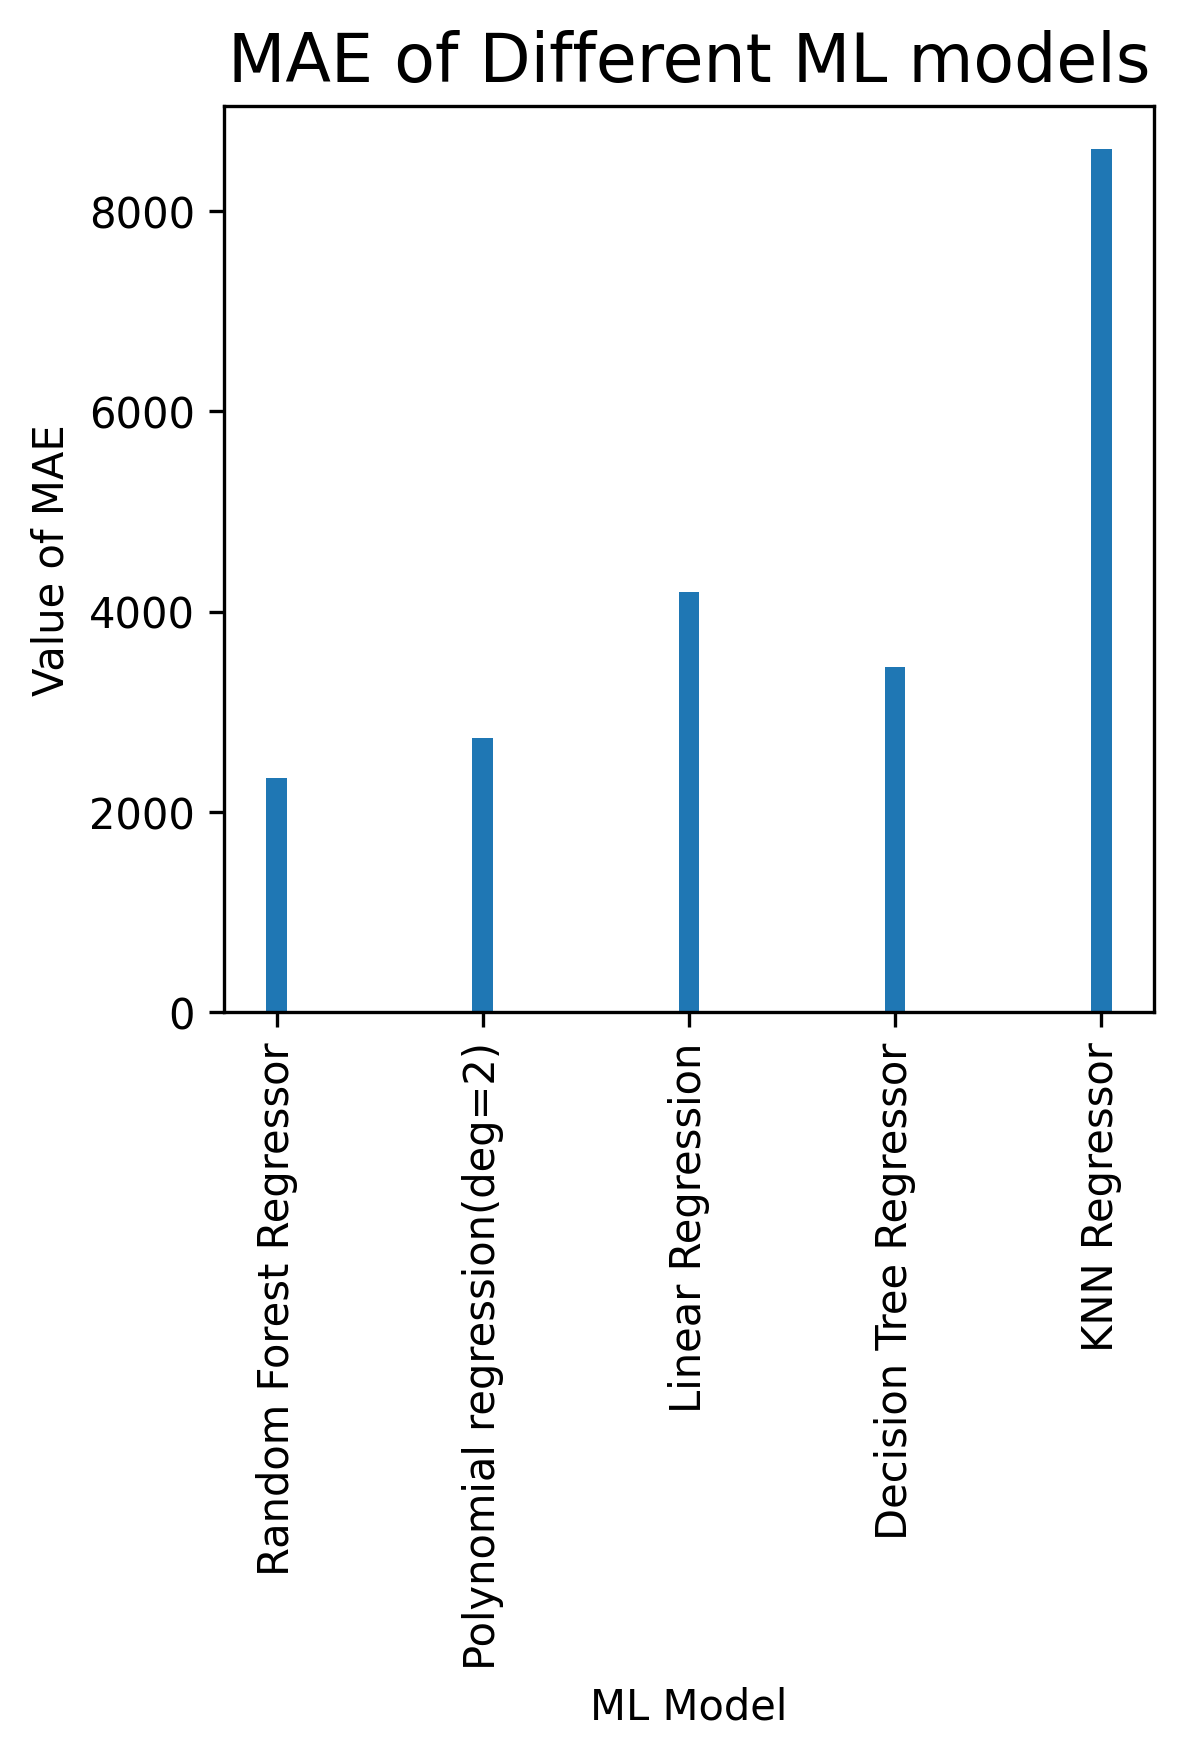

In [43]:
plt.figure(figsize=(4,4),dpi=300)
plt.bar(df1['Model'],df1["MAE"], width=.1)
plt.title("MAE of Different ML models",fontsize=16)
plt.xlabel("ML Model",fontsize=10)
plt.ylabel("Value of MAE",fontsize=10)
plt.xticks(rotation=90)
plt.show()

# High MAE value of a model means worst model

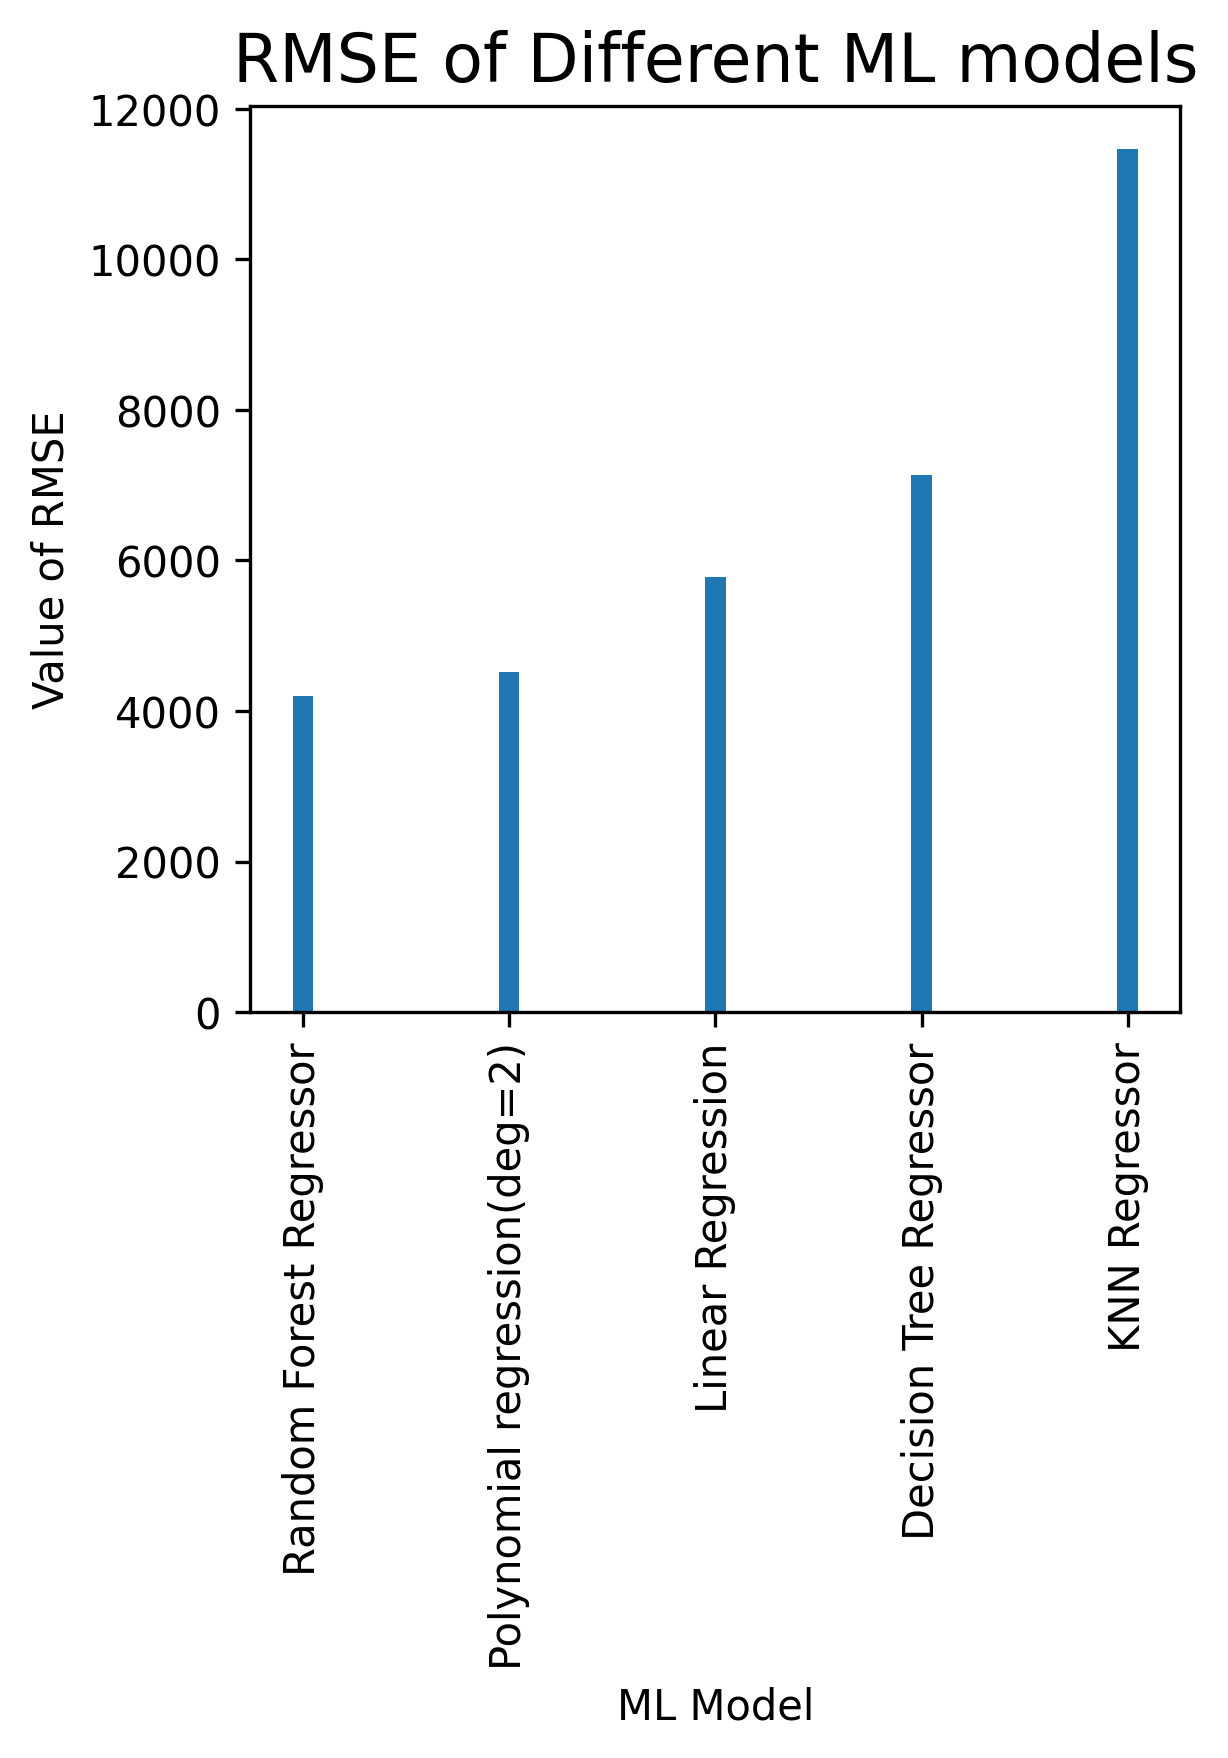

In [44]:
plt.figure(figsize=(4,4),dpi=300)
plt.bar(df1['Model'],df1["RMSE"], width=.1)
plt.title("RMSE of Different ML models",fontsize=16)
plt.xlabel("ML Model",fontsize=10)
plt.ylabel("Value of RMSE",fontsize=10)
plt.xticks(rotation=90)
plt.show()

# High RMSE value of model means worst model.

# Since,RANDOM FOREST REGRESSOR has higher R^2 value,lower MAE and lower RMSE VAlue than any other model which i have applied here .

# So,Best Model is RANDOM FOREST REGRESSOR 

# Accuracy of the Best Model is 88.41%

#                                      [ THANK YOU]